Nama : Meita Aryani

NIM : 09011381823106

Kelas : Kelas Bukit,Palembang

<h2> MENGKLASIFIKASI DATA MENGGUNAKAN METODE DECISION TREE

Decision  tree adalah  sebuah  diagram  alir  yang  berbentuk  seperti  struktur pohon  yang  mana  setiap internal  node menyatakan  pengujian  terhadap  suatu atribut,  setiap  cabang  menyatakan  output  dari  pegujian  tersebut  dan leaf  node menyatakan  kelas–kelas  atau  distribusi  kelas.

Decision tree digunakan untuk mengklasifikasikan suatu sampel data yang belum  diketahui  kelasnya  ke  dalam  kelas–kelas  yang  sudah  ada.  Jalur  pengujian data adalah pertama melalui root node dan terakhir adalah melalui leaf node yang akan menyimpulkan  prediksi  kelas  bagi  data  tersebut.  Atribut  data  harus  berupa  data kategorik, bila kontinu maka atribut harus didiskretisasi terlebih dahulu.

Node yang  paling  atas  disebut sebagai rootnode atau node akar. Sebuah root node akan memiliki beberapa edge keluar  tetapi  tidak  memiliki edge masuk, internal  node akan  memiliki  satu edge masuk  dan  beberapa edge keluar,  sedangkan leaf  node hanya  akan  memiliki  satu edge masuk tanpa memiliki edge keluar.
Pada pohon keputusan terdapat tiga jenis node, antara lain :

1.Akar
Merupakan node teratas, pada node ini tidak ada input dan dapat tidak mempunyai output atau dapat mempunyai output lebih dari satu.

2.Internal node
Merupakan node percabangan, pada node ini hanya terdapat satu input dan mempunyai output minimal dua.

3.Daun
Merupakan node akhir atau terminal node, pada node ini hanya terdapat satu input dan tidak mempunyai output (simpul terminal).
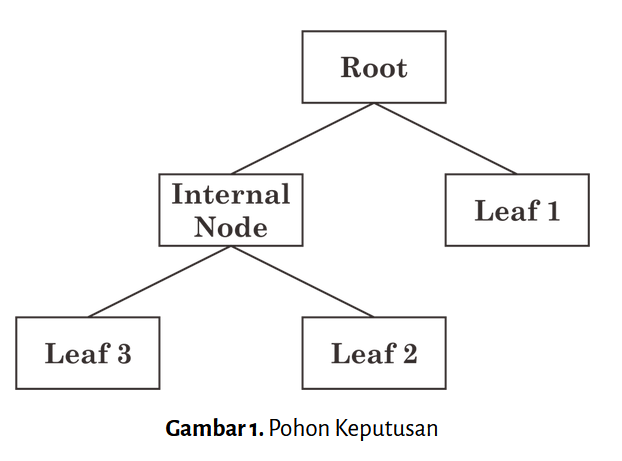



### Import Library

In [1]:
# memasukan library numpy untuk mengelola data numerik
import numpy as np 
# memasukan library pandas memanipulasi data
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
# memanggil file csv.
df = pd.read_csv("Prostate_Cancer.csv", delimiter=",")
# menampilkan 5 baris pada dataset
df[0:5]

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## Pre Proccesing

In [3]:
y = df["diagnosis_result"]
y[0:5]

0    M
1    B
2    M
3    M
4    M
Name: diagnosis_result, dtype: object

keterangan : 
M : Malignant
B : Balign

### Split data (train dan test data)

In [4]:
# untuk memudahkan dalam pembagian data train dan test
from sklearn.model_selection import train_test_split

In [5]:
# menggunakan data radius, texture, perimeter, area sebagai nilai x
X = df[['radius', 'texture', 'perimeter', 'area']]
# menggunakan data duagnosis_result sebagai nilai y
y = df["diagnosis_result"]
# menggunakan data training sebesar 80% dan testing sebesar 20%
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2)

### hasil setelah di split

In [6]:
print('X_train = ', X_trainset.shape)
print('X_test = ', X_testset.shape)
print('y_train = ', y_trainset.shape)
print('y_test = ', y_testset.shape)

X_train =  (80, 4)
X_test =  (20, 4)
y_train =  (80,)
y_test =  (20,)


artinya bahwa dimensi X_train dibagi menjadi 80 baris dan 4 kolom, X_test ( dibagi menjadi 20 baris dan 4 kolom), y_train (dibagi menjadi 80 baris dan 1 kolom) y_test ( dibagi menjadi 20 baris dan 1 kolom)

### Modeling

Pertama-tama kita akan membuat instance DecisionTreeClassifier yang disebut drugTree.
Di dalam classifier, tentukan criterion = "entropy" sehingga kita dapat melihat perolehan informasi dari setiap node.

Algoritma pada metode ini menggunakan konsep dari entropi. Konsep Entropi yang digunakan untuk mengukur “seberapa informatifnya” sebuah node (yang biasanya disebut seberapa baiknya).

Entropi(S) = 0, jika semua contoh pada S berada dalam kelas yang sama.
Entroiy(S) = 1, jika jumlah contoh positif dan jumlah contoh negatif dalam S adalah sama.
0 < Entropi(S) < 1, jika jumlah contoh positif dan negatif dalam S tidak sama.

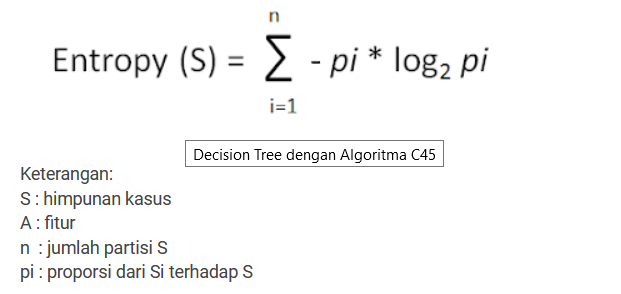


In [7]:
cancerTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
cancerTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

merupakan hiperparameter yang bisa diubah nantinya.

Selanjutnya, kita akan menyesuaikan data dengan matriks fitur pelatihan X_trainset dan vektor respons pelatihan y_trainset



In [8]:
cancerTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediksi

membuat beberapa prediksi pada dataset pengujian dan menyimpannya ke dalam variabel yang disebut predTree.

In [9]:
predTree = cancerTree.predict(X_testset)

selanjutnya mencetak predTree dan y_testset untuk membandingkan prediksi secara visual dengan nilai sebenarnya.



In [10]:
# mencetak nilai prediksi
print (predTree [0:5])
# mencetak nilai yang sebenarnya
print (y_testset [0:5])

['B' 'B' 'B' 'B' 'B']
79    B
19    B
55    B
24    M
48    B
Name: diagnosis_result, dtype: object


### Evaluation

impor metrik dari sklearn dan periksa keakuratan model.

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.85


Skor klasifikasi akurasi menghitung akurasi subset: kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label yang sesuai di y_true.

Dalam klasifikasi multilabel, fungsi mengembalikan akurasi subset. Jika seluruh rangkaian label yang diprediksi untuk sampel benar-benar cocok dengan rangkaian label yang sebenarnya, maka akurasi subset adalah 1.0; jika tidak, 0,0.

### Visualization

visualisasikan pohon itu

In [12]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


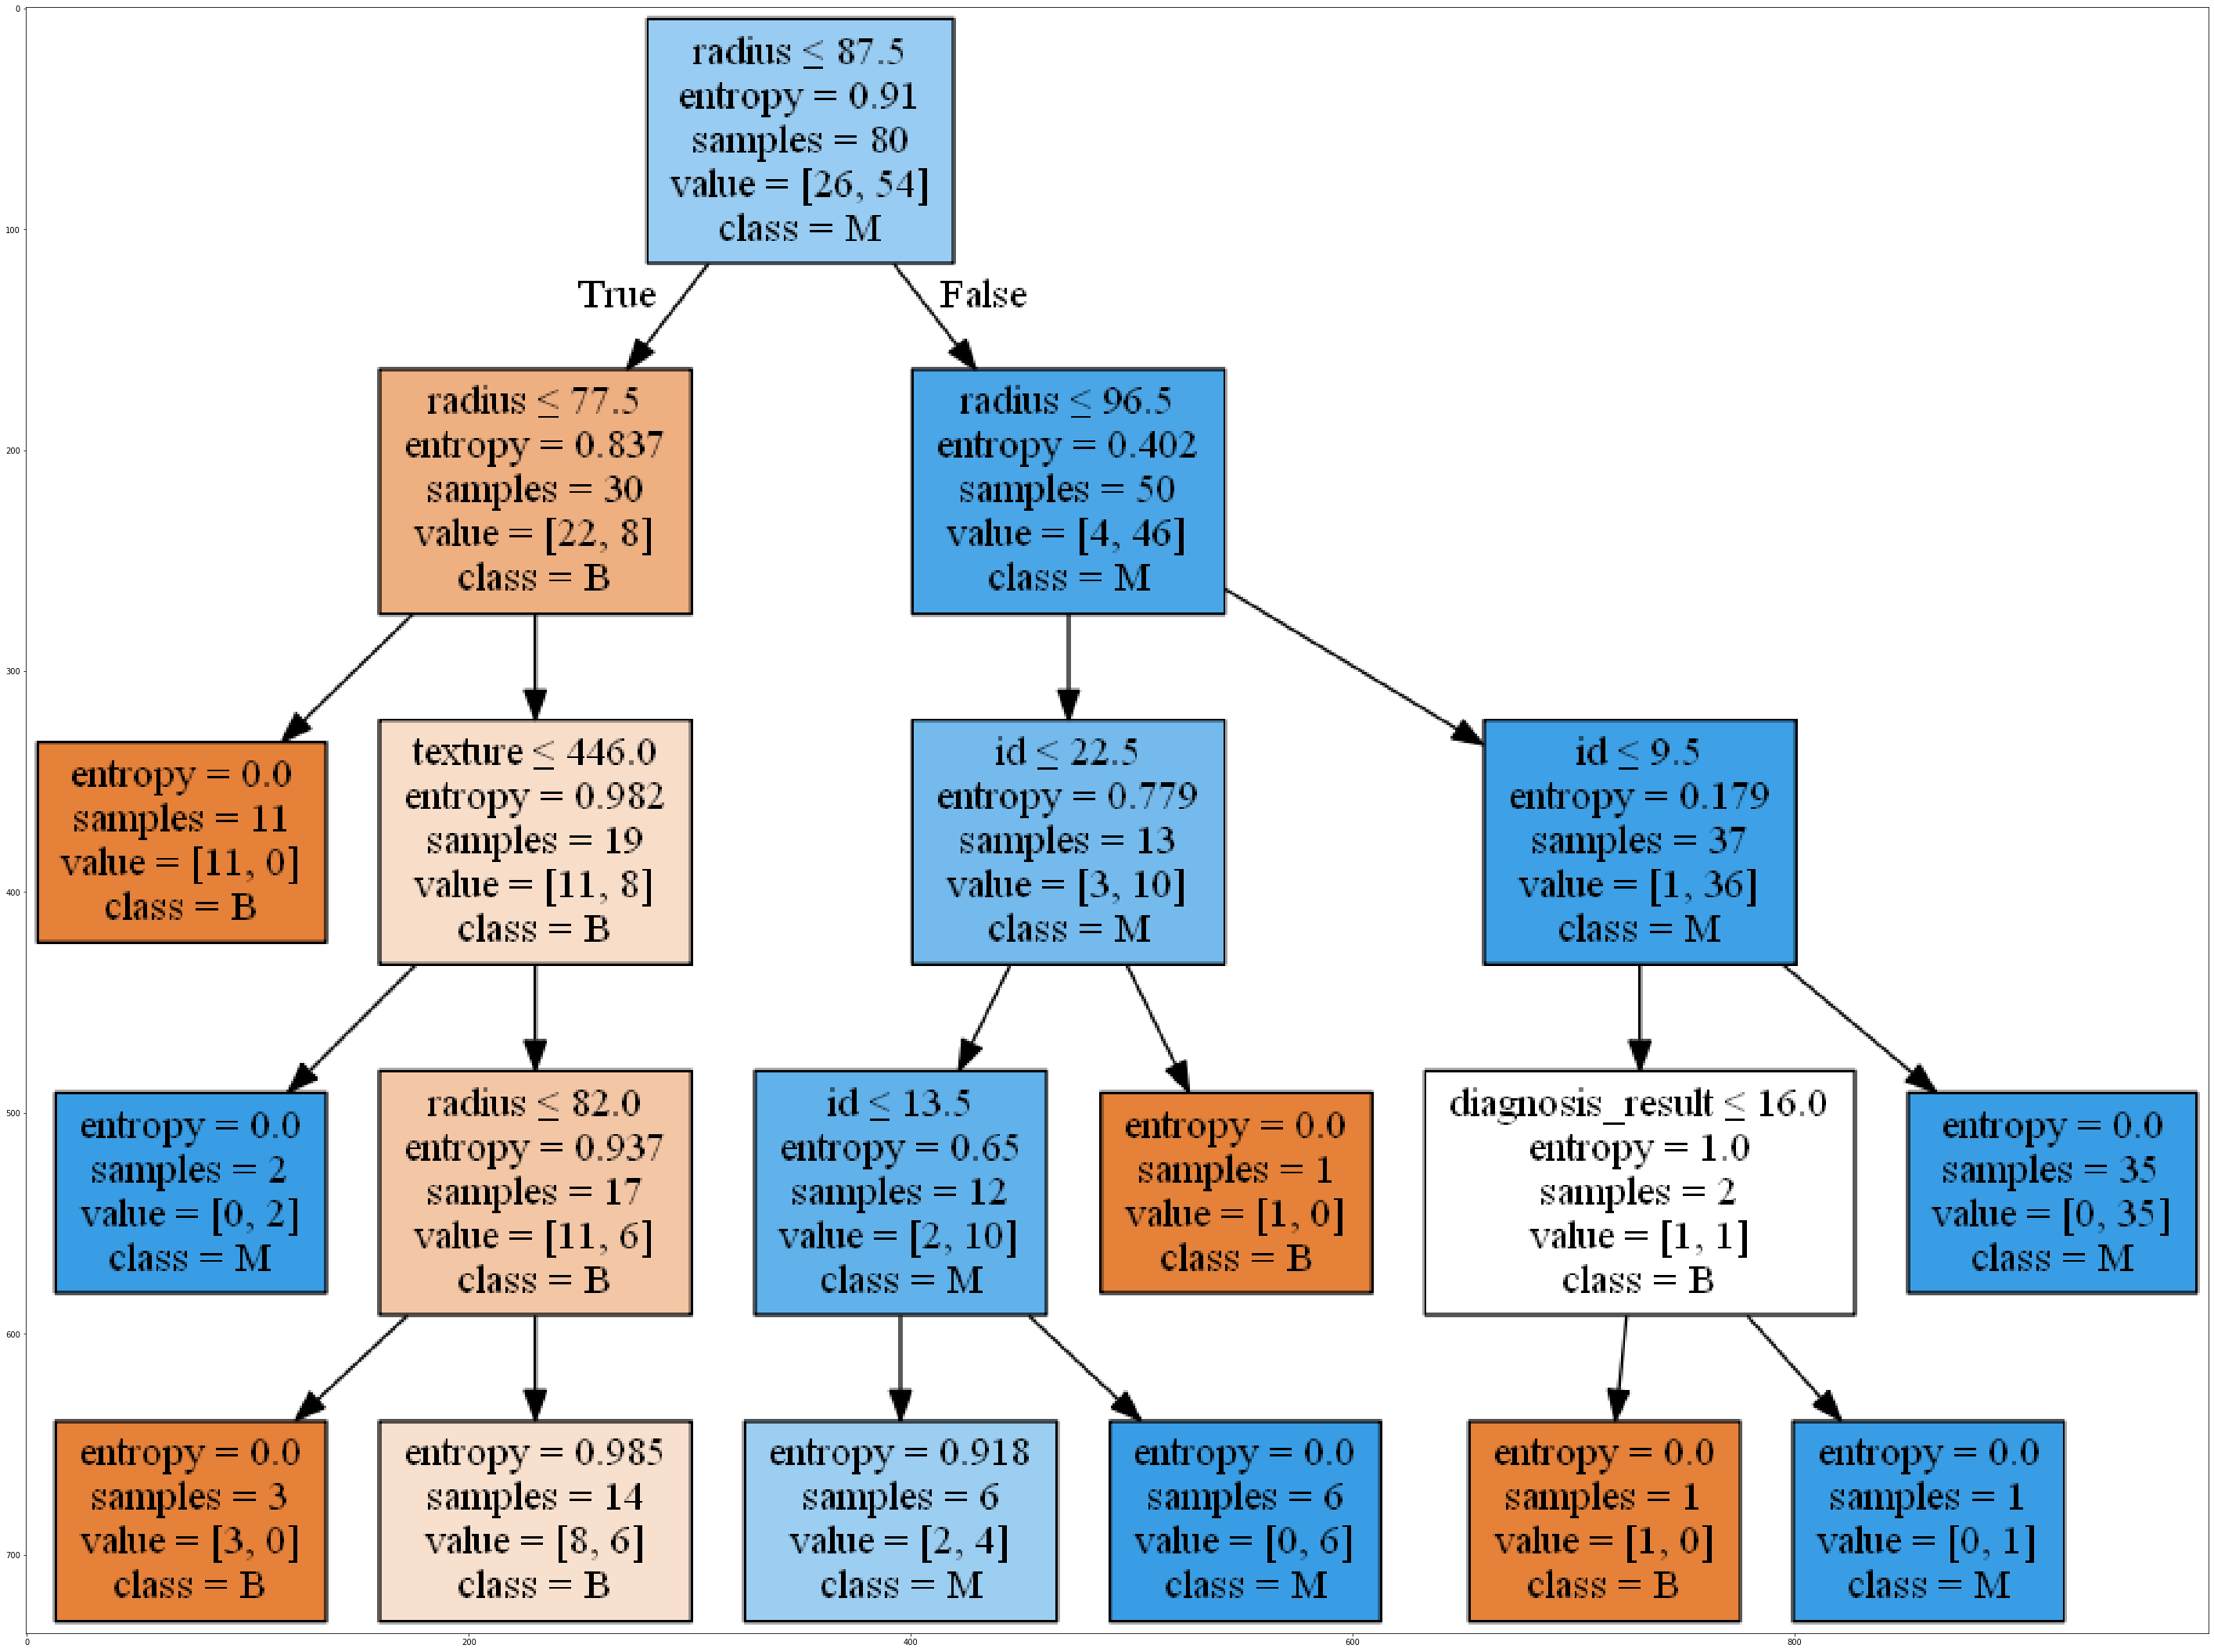

In [13]:
dot_data = StringIO()
filename = "cancerTree.png"
featureNames = df.columns[0:4]
targetNames = df["diagnosis_result"].unique().tolist()
out=tree.export_graphviz(cancerTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 80))
plt.imshow(img,interpolation='nearest')

Kesimpulan : 

Algoritma decision tree banyak digunakan dalam proses data mining karena memiliki beberapa 
kelebihan :
    1. Mudah mengintegrasikan dengan sistem basis data.
    2. Memiliki ketelitian yang baik.
    3. Dapat menemukan gabungan tak terduga dari suatu data.
    4. Daerah pengambilan keputusan yang sebelumnya kompleks dan sangat global dapat diubah menjadi lebih sederhana dan          spesifik.
    5. Dapat melakukan eliminasi untuk perhitungan-perhitungan yang tidak diperlukan. Karena ketika menggunakan metode ini maka sampel hanya diuji berdasarkan kriteria atau kelas tertentu.
    6. Fleksibel untuk memilih fitur dari internal node yang berbeda, fitur yang terpilih akan membedakan suatu kriteria dibandingkan kriteria yang lain dalam node yang sama.

Kekurangan pohon keputusan adalah.

    1.Terjadi overlap terutama ketika kelas-kelas dan kriteria yang digunakan jumlahnya sangat banyak. Hal tersebut juga dapat menyebabkan meningkatnya waktu pengambilan keputusan dan jumlah memori yang diperlukan.
    2.Pengakumulasian jumlah error dari setiap tingkat dalam sebuah pohon keputusan yang besar.
    3. Kesulitan dalam mendesain pohon keputusan yang optimal.
    4. Hasil kualitas keputusan yang didapatkan dari metode pohon keputusan sangat bergantung pada bagaimana pohon tersebut didesain.
